### Data Integrity Review for Sector III

This area contrasts with the previous two. It is predominantly commercial, with high pedestrian and vehicular traffic, as well as public transportation, all oriented towards commerce. There is minimal residential presence and no industrial factories, creating its own criminal microclimate.

-----------------------------------------------------------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'crimes_csv/zone_iii_crimes_locations.csv'
df = pd.read_csv(file_path, delimiter=',')

print(df.head())

         name  armed robbery  car theft  snatch theft  minor injuries  \
0  complaint1              0          0             1               0   
1  complaint2              2          0             0               0   
2  complaint3              1          0             0               0   
3  complaint4              1          0             1               0   
4  complaint5              0          0             1               0   

   robbery  serious injuries  theft  vandalism        date   latitude  \
0        0                 0      0          0  15/10/2017 -31.450954   
1        0                 0      0          0  04/07/2017 -31.451585   
2        0                 0      0          0  04/02/2013 -31.449146   
3        0                 0      0          0  17/10/2017 -31.451180   
4        2                 0      0          0  30/09/2011 -31.449115   

   longitude  
0 -64.247649  
1 -64.243820  
2 -64.243349  
3 -64.247421  
4 -64.247833  


In [2]:
nan_null_count = df.isnull().sum()
print("Count of NaN or null values per column:")
print(nan_null_count)

columns_all_zero = [col for col in df.columns if (df[col] == 0).all()]
print("\nColumns with all values equal to 0:")
print(columns_all_zero)

Count of NaN or null values per column:
name                0
armed robbery       0
car theft           0
snatch theft        0
minor injuries      0
robbery             0
serious injuries    0
theft               0
vandalism           0
date                0
latitude            0
longitude           0
dtype: int64

Columns with all values equal to 0:
['car theft', 'minor injuries', 'serious injuries', 'theft', 'vandalism']


-----------------------------------------------------------------------------------------------------------------------

Although it may seem repetitive, in these types of areas, it is imperative to point out that the absence of crimes would be extremely rare and almost impossible. If conducting a real investigation or recreating the original criminal investigation that led to this summary, it is essential to be aware of this. While all interviews will either report crimes or not be used, the lack of data would indicate a very serious gap that should raise all alarms.

-----------------------------------------------------------------------------------------------------------------------

In [3]:
columns_to_exclude = ['name', 'date', 'latitude', 'longitude']
columns_to_consider = [col for col in df.columns if col not in columns_to_exclude]

columns_with_non_zero_data = [col for col in columns_to_consider if (df[col] != 0).any()]

df_with_non_zero_data = df[columns_with_non_zero_data]

descriptive_statistics = df_with_non_zero_data.describe(include='all')

print("\nDescriptive statistics of columns with non-zero values:")
print(descriptive_statistics)


Descriptive statistics of columns with non-zero values:
       armed robbery  snatch theft    robbery
count     400.000000    400.000000  400.00000
mean        1.005000      1.035000    1.01000
std         0.834696      0.797097    0.81336
min         0.000000      0.000000    0.00000
25%         0.000000      0.000000    0.00000
50%         1.000000      1.000000    1.00000
75%         2.000000      2.000000    2.00000
max         2.000000      2.000000    2.00000


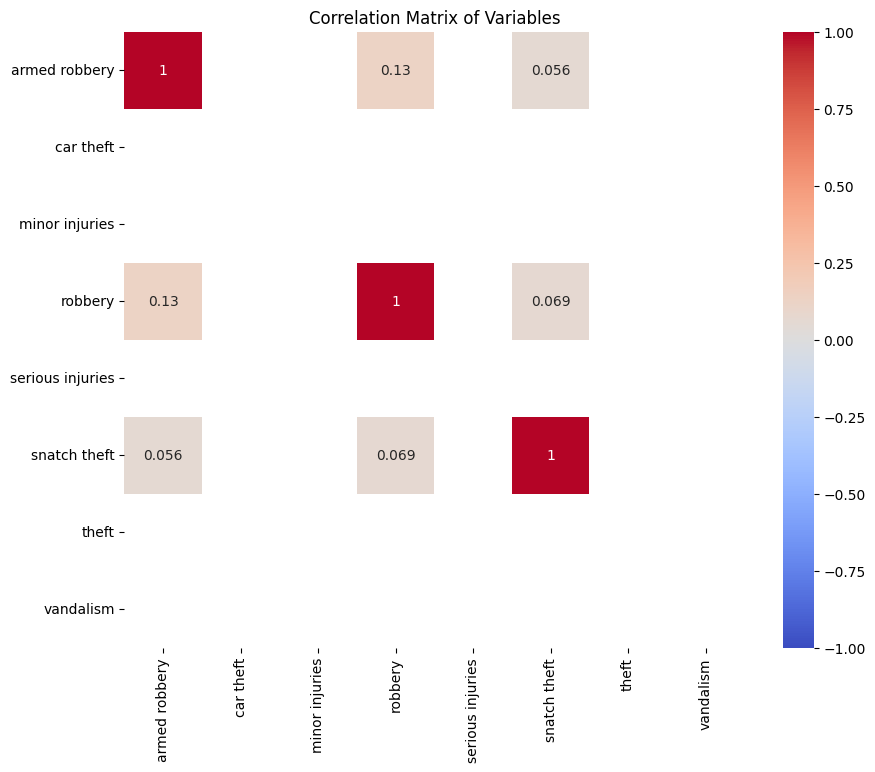

In [4]:
columns_of_interest = df.columns.difference(['name', 'date', 'latitude', 'longitude'])
df_filtered = df[columns_of_interest]

correlation_matrix = df_filtered.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Variables')
plt.show()

-----------------------------------------------------------------------------------------------------------------------

Now, although it may seem counterintuitive, we observe a lack of diversity in crimes and a concentration on those that specifically target a chosen interest. In this commercial area, targets include both merchants and customers/suppliers. The focus is on quick attacks, as people usually do not stay in the area for long and typically do not carry all their money or belongings with them for extended periods. The use of groups and weapons accelerates the approach and execution of the crime.

-----------------------------------------------------------------------------------------------------------------------

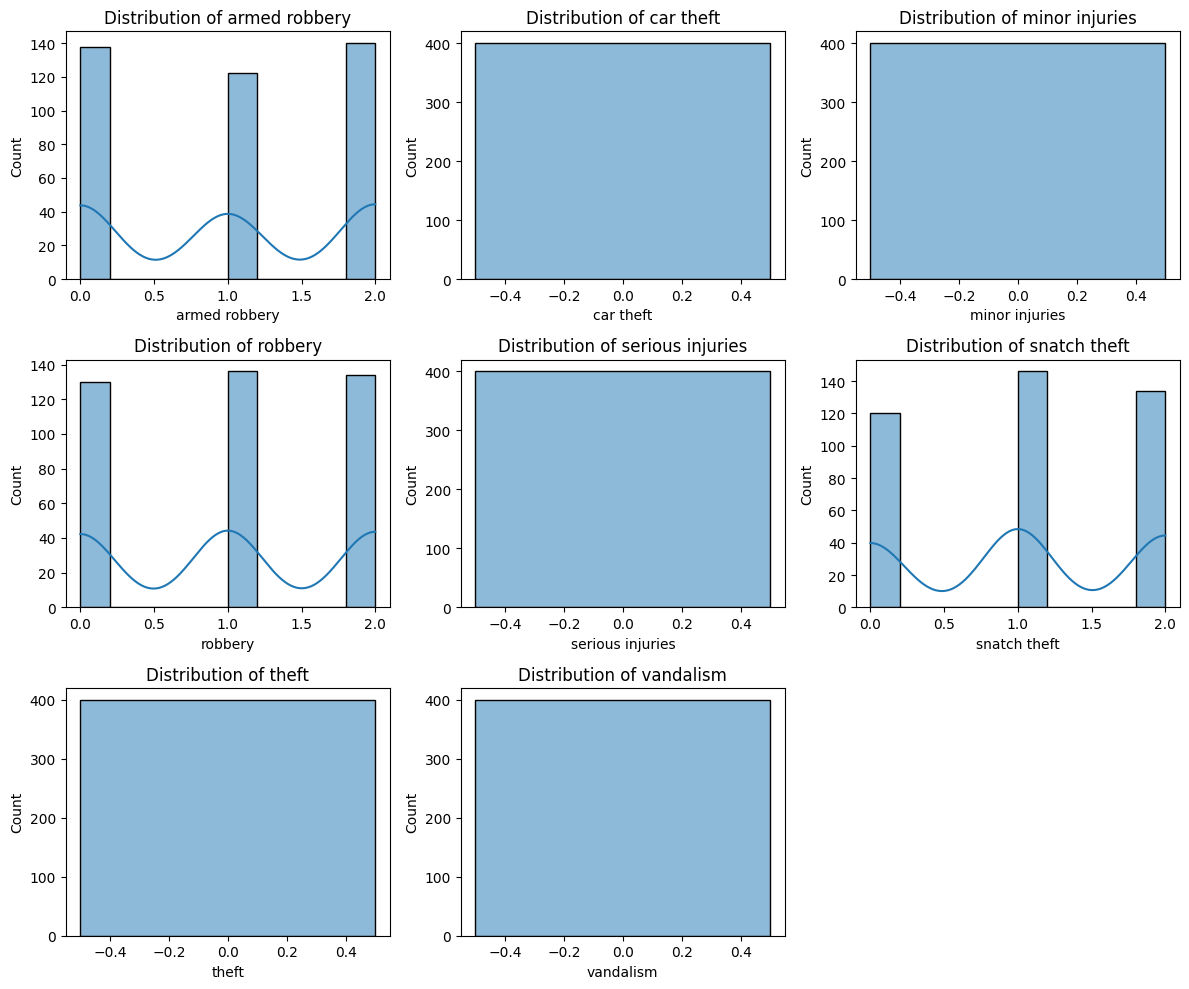

In [5]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns_of_interest, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------------------------------------

There is no direct relationship between the crimes themselves; they occur based on the "supply" of victims. This area, as mentioned, is commercial and also includes schools and public transportation stops. The key lies in the victim-crime relationship, which, being an essential part of the judicial record, I cannot detail. However, large concentrations of people, especially vulnerable individuals like children or the elderly, are more affected by these armed or group attacks. This allows criminals to acquire more stolen goods in less time. Unlike what might be assumed normally, where weapons are used to increase offensive capabilities over the victim, here we observe an inversely proportional relationship in that regard.

-----------------------------------------------------------------------------------------------------------------------

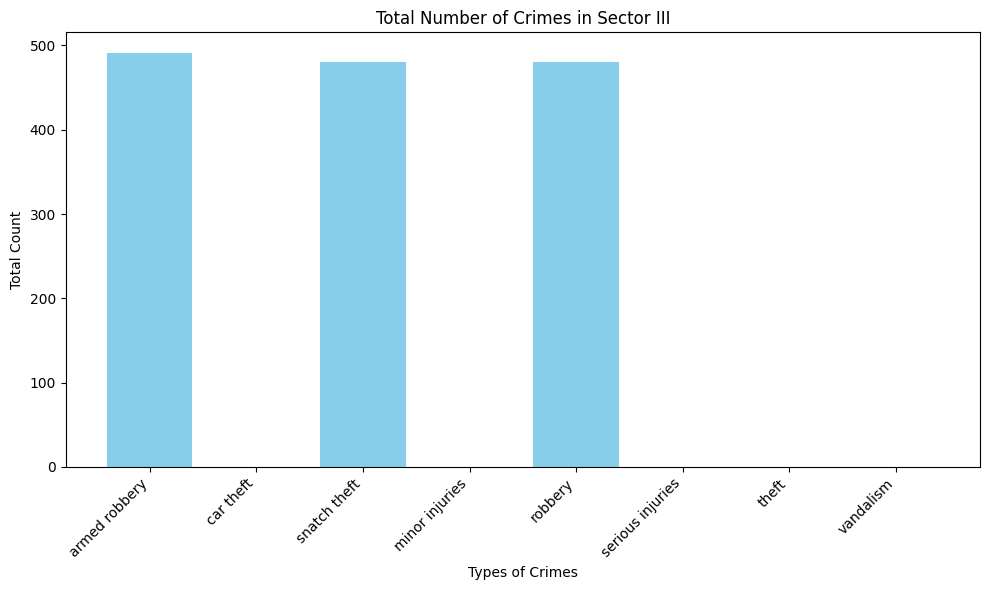

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("crimes_csv/zone_iii_crimes.csv")

sumas_delitos = df.iloc[:, 1:-1].sum()
nombres_delitos = df.columns[1:-1]

plt.figure(figsize=(10, 6))
plt.bar(nombres_delitos, sumas_delitos, color="skyblue")
plt.xlabel("Types of Crimes")
plt.ylabel("Total Count")
plt.title("Total Number of Crimes in Sector III")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

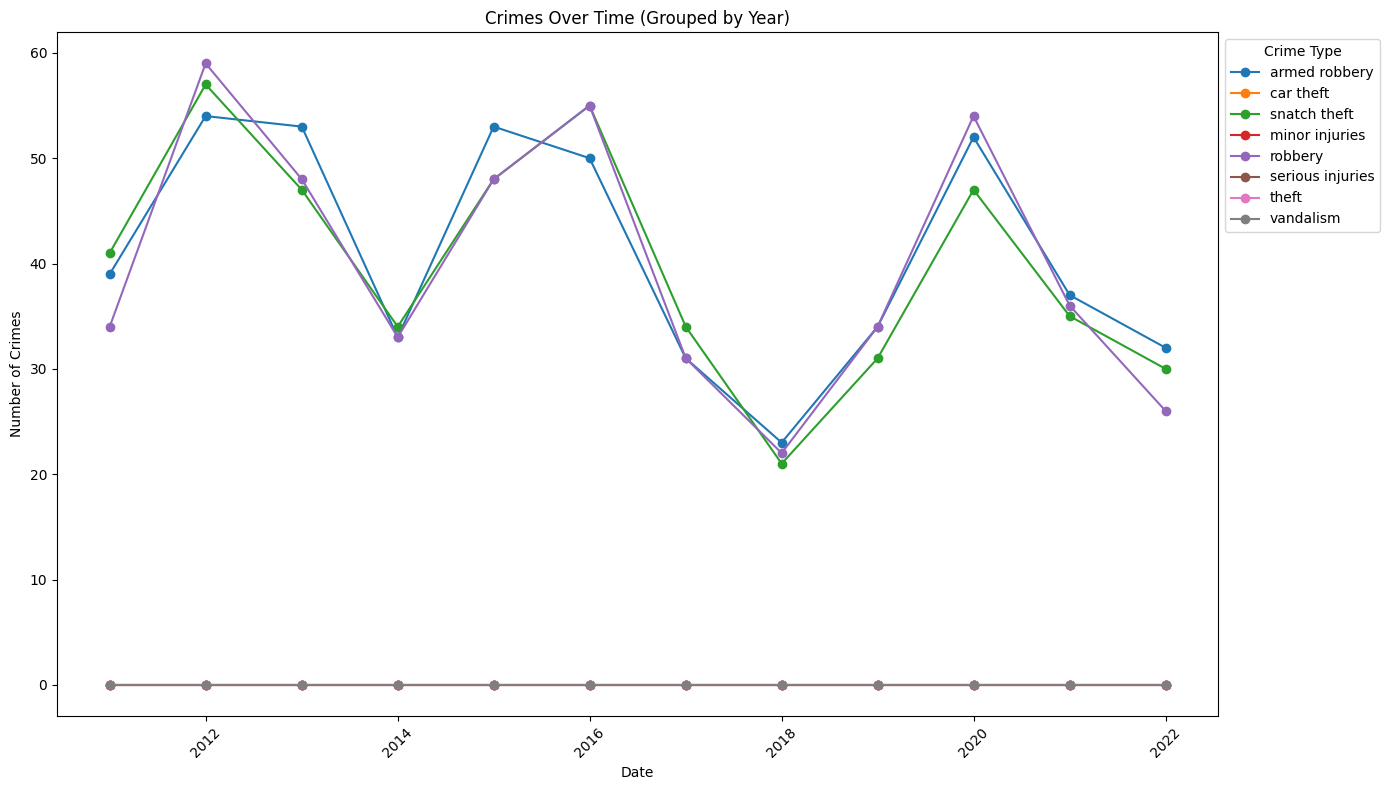

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')
df = df.drop(columns=['name'])

crimes_per_year = df.groupby(pd.Grouper(key='date', freq='Y')).sum().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

for column in crimes_per_year.columns[1:]:
    ax.plot(crimes_per_year['date'], crimes_per_year[column], marker='o', label=column)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Crimes')
ax.set_title('Crimes Over Time (Grouped by Year)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Crime Type')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

-----------------------------------------------------------------------------------------------------------------------

Again, we observe the fluctuation in how this change affects or occurs between the moments when the corresponding strategies were applied and when they were not. It is important to remember that the data is collected after the events; therefore, the date reflects the interview and not necessarily when the event occurred. For temporal accuracy, data from the prosecutor's office, which focuses on criminal investigation, is used, as it is a part of this investigation.

-----------------------------------------------------------------------------------------------------------------------